In [1]:
import os

from NN import MLP

import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_style("whitegrid")

In [2]:
N_samples = 1000
test_size = 0.1

In [3]:
X, y =  make_moons(n_samples=N_samples, noise=0.2, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

In [6]:
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

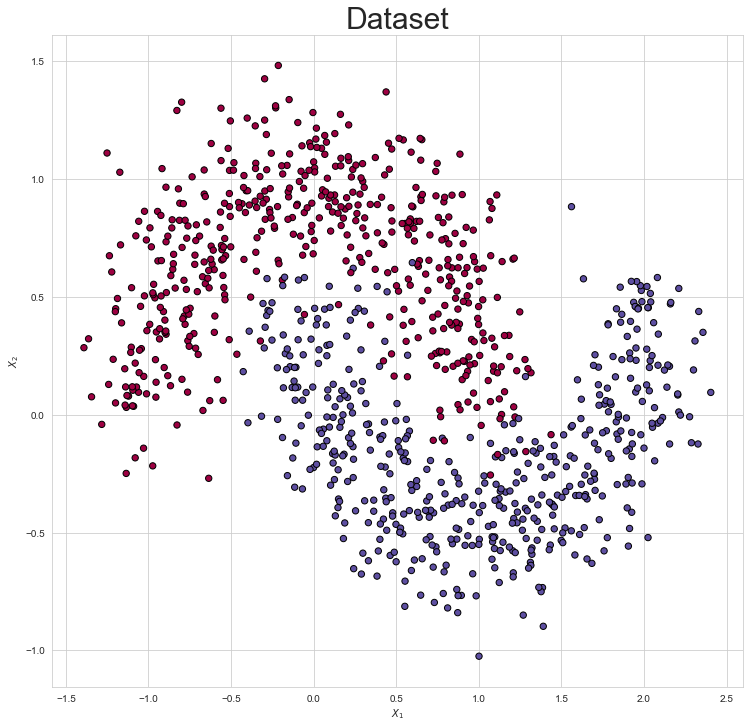

In [7]:
make_plot(X, y, 'Dataset')

In [8]:
network = [

    {'input_dim': 2, 'output_dim': 25, 'activation': 'relu'},
    {'input_dim': 25, 'output_dim': 50, 'activation': 'relu'},
    {'input_dim': 50, 'output_dim': 50, 'activation': 'relu'},
    {'input_dim': 50, 'output_dim': 25, 'activation': 'relu'},
    {'input_dim': 25, 'output_dim': 1, 'activation': 'sigmoid'}

]

In [9]:
# training
model = MLP.MLP(network)
weights = model.train(X_train, y_train,
                      epochs=1000,
                      learning_rate=0.1,
                      verbose=True)

Epoch 0/1000 - loss: 0.6936484871866765 - acc: 0.5044444444444445
Epoch 50/1000 - loss: 0.6923862638033648 - acc: 0.5044444444444445
Epoch 100/1000 - loss: 0.6911043818494119 - acc: 0.5044444444444445
Epoch 150/1000 - loss: 0.688332308493886 - acc: 0.7555555555555555
Epoch 200/1000 - loss: 0.6791355008098174 - acc: 0.8444444444444444
Epoch 250/1000 - loss: 0.6329074620201377 - acc: 0.8433333333333334
Epoch 300/1000 - loss: 0.4334193616220916 - acc: 0.8577777777777778
Epoch 350/1000 - loss: 0.2937875851880618 - acc: 0.8811111111111111
Epoch 400/1000 - loss: 0.26837644441872427 - acc: 0.88
Epoch 450/1000 - loss: 0.2542938426666458 - acc: 0.8844444444444445
Epoch 500/1000 - loss: 0.23908888180164958 - acc: 0.89
Epoch 550/1000 - loss: 0.21587963707404706 - acc: 0.9011111111111111
Epoch 600/1000 - loss: 0.17539465446069552 - acc: 0.93
Epoch 650/1000 - loss: 0.12951845392405112 - acc: 0.9488888888888889
Epoch 700/1000 - loss: 0.10633902654572062 - acc: 0.9588888888888889
Epoch 750/1000 - los

In [10]:
# prediction
preds = model.predict(weights=weights,
                      X_test=X_test)

In [11]:
model.network_accuracy(preds=preds, y_test=y_test)

Network on Accuracy: 0.95


0.95